In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mengambil data dari *.csv**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/SulthanAbiyyu/mini-bootcamp-bcc-2023/master/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Membersihkan data dari null**



In [4]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
mean_total_bedrooms = data['total_bedrooms'].mean()
mean_total_bedrooms

data['total_bedrooms'].fillna(value=mean_total_bedrooms, inplace=True)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
# Drop kolom yang tidak berguna
data = data.drop([], axis=1)

### **Membersihkan data dari outlier**

#### Outlier kategorikal

In [7]:
ocean_proximity_counts = data['ocean_proximity'].nunique()
ocean_proximity_values = data['ocean_proximity'].unique()

print('ocean proximity counts:', ocean_proximity_counts)
print('ocean proximity values:', ocean_proximity_values)
print(data['ocean_proximity'].value_counts())

ocean proximity counts: 5
ocean proximity values: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [8]:
ocean_proximity_mode = data['ocean_proximity'].mode()

data['ocean_proximity'].replace('NEAR BAY', 'NEAR OCEAN', inplace=True)

data['ocean_proximity'].replace("ISLAND", ocean_proximity_mode[0], inplace=True)
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9141
INLAND        6551
NEAR OCEAN    4948
Name: count, dtype: int64

#### Outlier numerikal

In [9]:
def plot_boxplot_with_outliers(df, column_name):
    plt.boxplot(df[column_name], vert=False)
    plt.xlabel(column_name)
    plt.title('Outliers pada ' + column_name)
    plt.show()

def remove_outliers_iqr(data, column_name):

    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)

    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    outlier_filter = (data[column_name] < minimum) | (
        data[column_name] > maximum)

    # print(outlier_filter)

    data = data[~outlier_filter]

    return data

def remove_outliers_zscore(data, column_name, treshold):
    mean = data[column_name].mean()
    std = data[column_name].std()

    outliers = []
    for i in data[column_name]:
        z = (i-mean)/std
        if z > treshold:
            outliers.append(i)

    filter_outliers = ~data[column_name].isin(outliers)
    data = data[filter_outliers]

    return data

In [10]:
# data = remove_outliers_iqr(data, 'median_income')
data = remove_outliers_zscore(data, 'median_house_value', 2.3)
data = remove_outliers_zscore(data, 'total_rooms', 2.3)
data = remove_outliers_zscore(data, 'total_bedrooms', 2.3)
data = remove_outliers_zscore(data, 'housing_median_age', 2.3)
# data = remove_outliers_iqr(data, 'households')

# plot_boxplot_with_outliers(data, 'median_income')
# plot_boxplot_with_outliers(data, 'median_house_value')
# plot_boxplot_with_outliers(data, 'total_rooms')
# plot_boxplot_with_outliers(data, 'total_bedrooms')
# plot_boxplot_with_outliers(data, 'housing_median_age')
# plot_boxplot_with_outliers(data, 'households')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR OCEAN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR OCEAN
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### **Explanatory data analysis**

In [30]:
def plt_bar_plot(x, y, title, label_x, label_y):
    plt.bar(x, y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()
    plt_bar_plot(x, y, 'Distribusi jarak rumah dari laut', 'Jarak dari laut', 'jumlah')

# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")

def plt_hist(x, y, title, label_x, label_y):
    plt.hist(y, x)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()

def dist_plot(df, title):
    plt.figure(figsize=(10, 4))
    sns.displot(df)
    plt.title(title)
    sns.despine()
    plt.show()

g = sns.FacetGrid(data, col='median_income')
g.map_dataframe(sns.histplot)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fdf217a74c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 3367500x300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 3367500x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3.3675e+06x300 with 2567 Axes>

#### Univariate

#### Distribusi jarak rumah dari laut

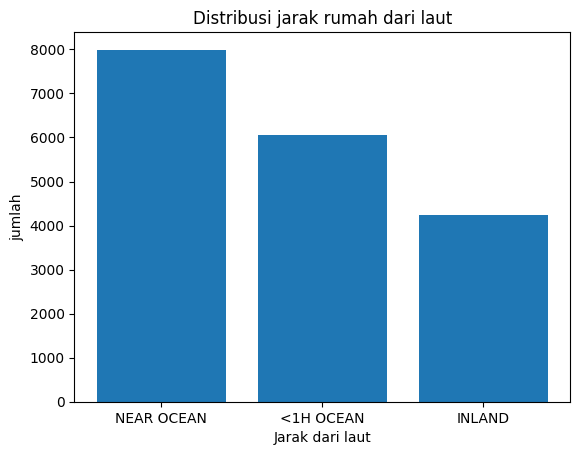

<Figure size 1000x400 with 0 Axes>

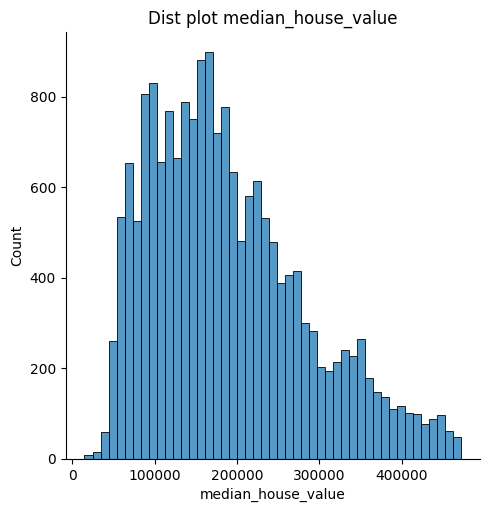

<Figure size 1000x400 with 0 Axes>

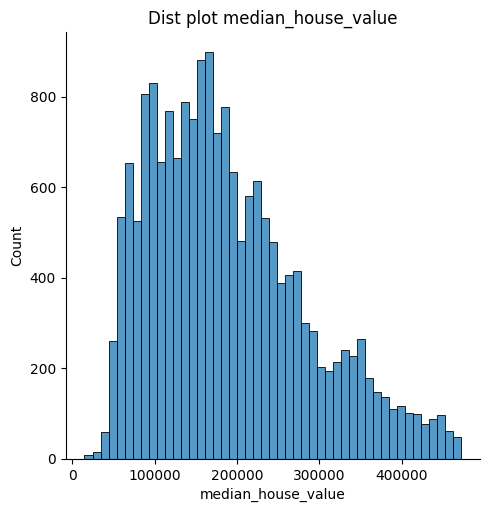

<Figure size 1000x400 with 0 Axes>

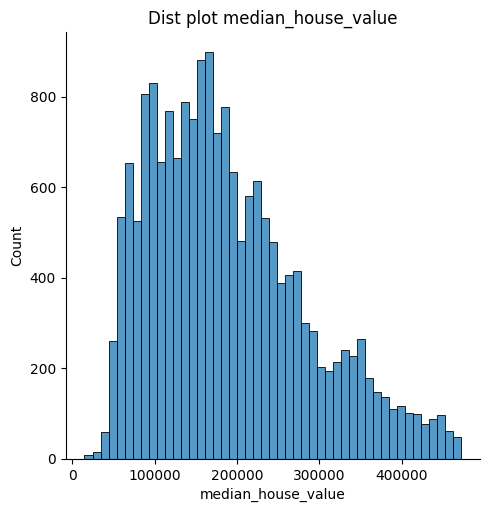

<Figure size 1000x400 with 0 Axes>

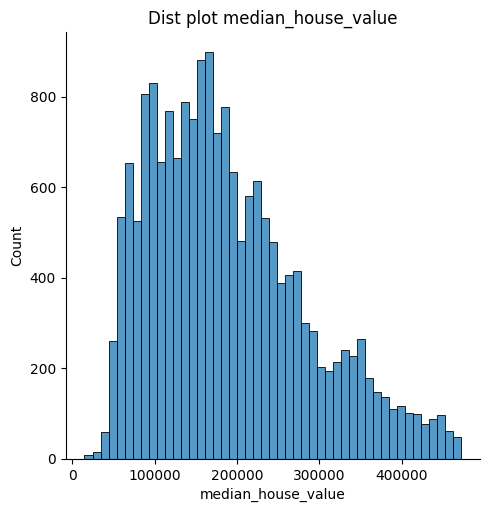

<Figure size 1000x400 with 0 Axes>

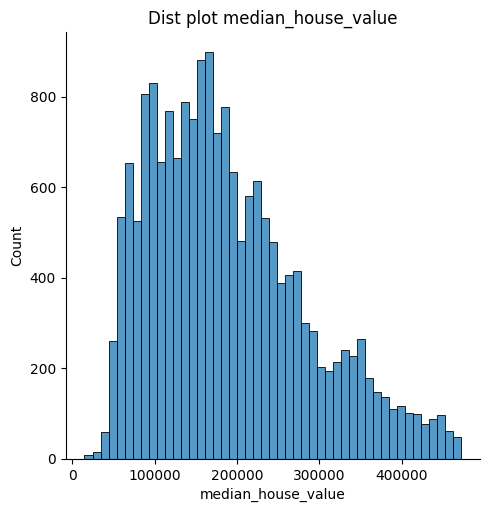

<Figure size 1000x400 with 0 Axes>

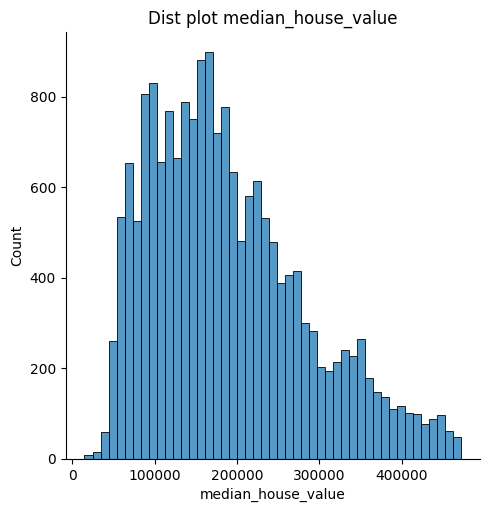

<Figure size 1000x400 with 0 Axes>

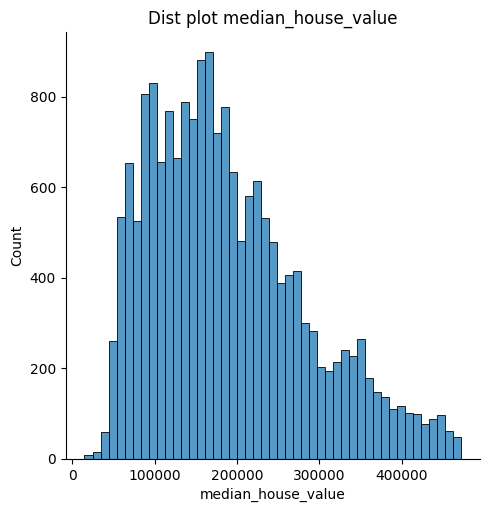

In [12]:
x = data['ocean_proximity'].unique()
y = data['ocean_proximity'].value_counts()

# plt_bar_plot(x, y, 'Distribusi jarak rumah dari laut', 'Jarak dari laut', 'jumlah')

# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")


## **Machine Learning**

### **Data preprocessing**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

#### Split

In [14]:
train, test = train_test_split(data, test_size = 0.20, random_state=3054)

print('banyak data: ', len(data))
print('banyak data test: ', len(test))
print('banyak data train: ', len(train))

banyak data:  18297
banyak data test:  3660
banyak data train:  14637


In [15]:
label_regresi = 'median_house_value'

# Train data
train_data = train.drop(label_regresi, axis=1)
train_label_regresi = train[label_regresi]

# Test data
test_data = test.drop(label_regresi, axis=1)
test_label_regresi = test[label_regresi]

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14322,-117.15,32.70,52.0,458.0,148.0,1283.0,166.0,1.2863,NEAR OCEAN
9922,-122.32,38.32,22.0,2483.0,528.0,1478.0,492.0,4.0878,NEAR OCEAN
16110,-122.49,37.74,44.0,1472.0,275.0,820.0,310.0,5.6826,NEAR OCEAN
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,INLAND
20548,-121.76,38.68,38.0,674.0,178.0,701.0,189.0,1.3942,INLAND
...,...,...,...,...,...,...,...,...,...
775,-122.10,37.65,25.0,2538.0,494.0,1185.0,501.0,4.5417,NEAR OCEAN
10423,-117.62,33.47,4.0,1812.0,255.0,661.0,211.0,6.4870,NEAR OCEAN
17912,-121.98,37.36,35.0,1293.0,223.0,701.0,216.0,7.8543,<1H OCEAN
6690,-118.08,34.14,52.0,1282.0,189.0,431.0,187.0,6.1159,INLAND


#### Feature transformation

In [16]:
kolom_objek = train_data.select_dtypes(include=object).columns.tolist()
kolom_numerik = train_data.select_dtypes(include=object).columns.tolist()

In [17]:
ohe = OneHotEncoder()

# Train data
train_ohe = ohe.fit_transform(train_data[kolom_objek]).toarray()
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
train_data = pd.concat([train_data.reset_index(drop=True), train_ohe], axis=1)
train_data = train_data.drop(kolom_objek, axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
0,-117.15,32.70,52.0,458.0,148.0,1283.0,166.0,1.2863,0.0,0.0,1.0
1,-122.32,38.32,22.0,2483.0,528.0,1478.0,492.0,4.0878,0.0,0.0,1.0
2,-122.49,37.74,44.0,1472.0,275.0,820.0,310.0,5.6826,0.0,0.0,1.0
3,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,0.0,1.0,0.0
4,-121.76,38.68,38.0,674.0,178.0,701.0,189.0,1.3942,0.0,1.0,0.0


In [18]:
# Test data
test_ohe = ohe.transform(test_data[kolom_objek]).toarray()
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
test_data = pd.concat([test_data.reset_index(drop=True), test_ohe], axis=1)
test_data = test_data.drop(kolom_objek, axis=1)
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
0,-122.27,37.82,40.0,946.0,375.000000,700.0,352.0,1.7750,0.0,0.0,1.0
1,-115.49,32.69,17.0,1960.0,389.000000,1691.0,356.0,1.8990,0.0,1.0,0.0
2,-117.09,32.77,31.0,3062.0,537.870553,1263.0,539.0,3.0875,0.0,0.0,1.0
3,-121.66,39.15,22.0,2144.0,376.000000,1200.0,370.0,3.4426,0.0,1.0,0.0
4,-116.72,33.56,13.0,3166.0,682.000000,1250.0,475.0,2.3550,0.0,1.0,0.0


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   3660 non-null   float64
 1   latitude                    3660 non-null   float64
 2   housing_median_age          3660 non-null   float64
 3   total_rooms                 3660 non-null   float64
 4   total_bedrooms              3660 non-null   float64
 5   population                  3660 non-null   float64
 6   households                  3660 non-null   float64
 7   median_income               3660 non-null   float64
 8   ocean_proximity_<1H OCEAN   3660 non-null   float64
 9   ocean_proximity_INLAND      3660 non-null   float64
 10  ocean_proximity_NEAR OCEAN  3660 non-null   float64
dtypes: float64(11)
memory usage: 314.7 KB


#### Scaling

In [20]:
kolom_objek = train_data.select_dtypes(include=object).columns.tolist()
kolom_numerik = train_data.select_dtypes(include=np.number).columns.tolist()

In [21]:
# Standard Scaling
ss = StandardScaler()

train_ss = train_data.copy()
train_ss[kolom_numerik] = ss.fit_transform(train_data[kolom_numerik])
#train_ss.head()

test_ss = test_data.copy()
test_ss[kolom_numerik] = ss.transform(test_data[kolom_numerik])
train_ss.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
count,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04,1.463700e+04
mean,1.868955e-17,1.157296e-15,2.767024e-17,-3.082562e-17,1.212394e-16,5.048606e-17,-1.504873e-17,1.089819e-16,-6.893289e-17,-4.368986e-18,-1.262151e-17
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-2.383381e+00,-1.451474e+00,-2.304067e+00,-1.841196e+00,-1.959138e+00,-1.787923e+00,-1.942388e+00,-2.026999e+00,-8.819554e-01,-7.047168e-01,-5.475361e-01
25%,-1.088569e+00,-8.066982e-01,-8.341788e-01,-6.892531e-01,-7.213671e-01,-6.866200e-01,-7.043841e-01,-7.332409e-01,-8.819554e-01,-7.047168e-01,-5.475361e-01
50%,5.161974e-01,-6.443445e-01,6.408649e-02,-1.761752e-01,-1.688675e-01,-1.737232e-01,-1.692764e-01,-1.445892e-01,-8.819554e-01,-7.047168e-01,-5.475361e-01
75%,7.861582e-01,9.559984e-01,6.357099e-01,5.239278e-01,5.677987e-01,5.072897e-01,5.744327e-01,5.811396e-01,1.133844e+00,1.419010e+00,-5.475361e-01
max,2.545902e+00,2.913519e+00,1.860617e+00,4.410907e+00,3.056189e+00,1.064982e+01,5.018548e+00,7.317831e+00,1.133844e+00,1.419010e+00,1.826364e+00


In [22]:
# Min Max Scaling
mm = MinMaxScaler()

train_mm = train_data.copy()
train_mm[kolom_numerik] = mm.fit_transform(train_data[kolom_numerik])
#train_mm.head()

test_mm = test_data.copy()
test_mm[kolom_numerik] = mm.transform(test_data[kolom_numerik])
test_mm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,0.478454,0.339057,0.545178,0.295413,0.391923,0.143555,0.280113,0.217304,0.433880,0.328962,0.237158
std,0.203914,0.231300,0.243892,0.162731,0.204042,0.081204,0.147293,0.107966,0.495677,0.469900,0.425398
min,0.009128,0.002125,0.000000,-0.000529,0.000000,0.000229,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257606,0.148778,0.333333,0.181866,0.242528,0.088431,0.174593,0.137460,0.000000,0.000000,0.000000
50%,0.580629,0.195537,0.549020,0.266446,0.358668,0.128637,0.256026,0.201918,0.000000,0.000000,0.000000
75%,0.640974,0.554729,0.705882,0.381635,0.507472,0.183734,0.364169,0.281031,1.000000,1.000000,0.000000
max,0.992901,0.990436,1.000000,0.997750,0.999146,0.655212,0.935505,1.000000,1.000000,1.000000,1.000000


### **Training**

In [23]:
from sklearn.linear_model import *

model = LinearRegression()
model.fit(train_mm, train_label_regresi)

LinearRegression()

In [24]:
prediksi = model.predict(test_mm)
prediksi[:5]

array([173440.,  25984., 193408., 110016., 101952.])

In [25]:
test_label_regresi[:5]

49       112500.0
2751      64000.0
14152    291500.0
19710    102400.0
12311    122900.0
Name: median_house_value, dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error

# skor
mse = mean_squared_error(test_label_regresi, prediksi)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print("RMSE: ", rmse)

MSE:  3525221342.7718577
RMSE:  59373.57444833398
